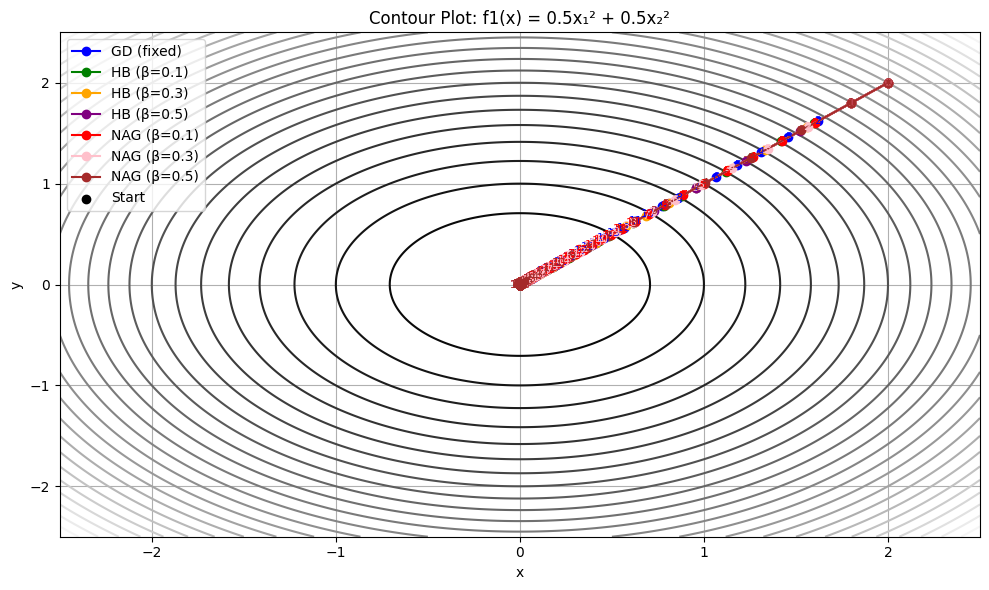

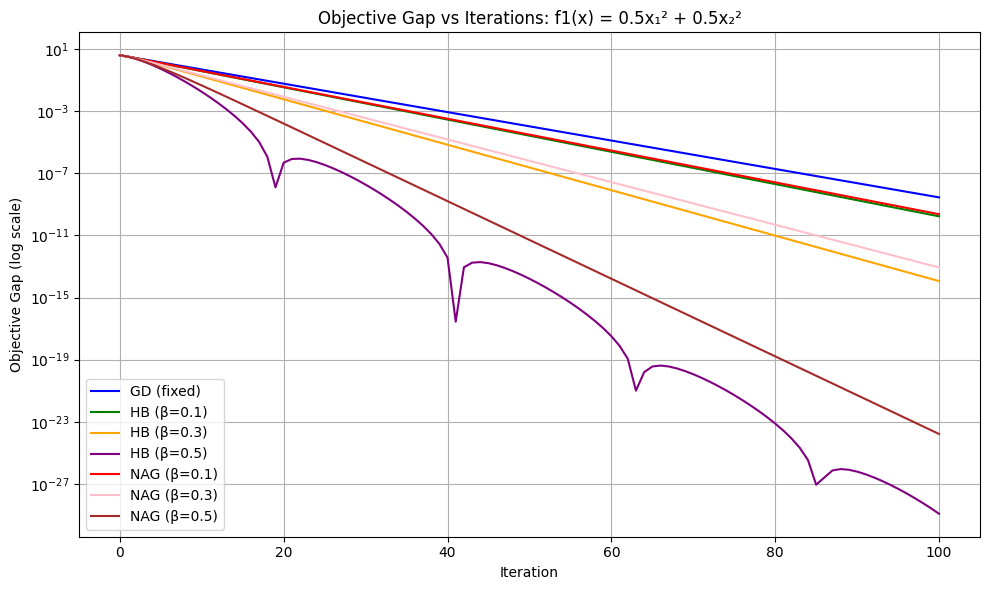

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Gradient Descent with fixed step size
def gradient_descent_fixed(f, grad_f, x0, step_size=0.1, max_iter=100):
    x = x0.copy()
    path = [x.copy()]
    for _ in range(max_iter):
        grad = grad_f(x)
        x = x - step_size * grad
        path.append(x.copy())
    return np.array(path)

# Heavy Ball with fixed step size
def heavy_ball_fixed(f, grad_f, x0, beta, step_size=0.1, max_iter=100):
    x_prev = x0.copy()
    x = x0.copy()
    path = [x.copy()]
    for _ in range(max_iter):
        grad = grad_f(x)
        x_new = x - step_size * grad + beta * (x - x_prev)
        x_prev, x = x, x_new
        path.append(x.copy())
    return np.array(path)

# Nesterov with fixed step size
def nesterov_fixed(f, grad_f, x0, beta, step_size=0.1, max_iter=100):
    x_prev = x0.copy()
    x = x0.copy()
    path = [x.copy()]
    for _ in range(max_iter):
        y = x + beta * (x - x_prev)
        grad = grad_f(y)
        x_new = y - step_size * grad
        x_prev, x = x, x_new
        path.append(x.copy())
    return np.array(path)

# Function f1 and its gradient
def f1(x): return 0.5 * x[0]**2 + 0.5 * x[1]**2
def grad_f1(x): return np.array([x[0], x[1]])

# Starting point and parameters
start = np.array([2.0, 2.0])
max_iter = 100
step_size = 0.1
beta_values = [0.1, 0.3, 0.5]

# Generate optimization paths
paths_gd = gradient_descent_fixed(f1, grad_f1, start, step_size, max_iter)
paths_hb = [heavy_ball_fixed(f1, grad_f1, start, beta, step_size, max_iter) for beta in beta_values]
paths_nag = [nesterov_fixed(f1, grad_f1, start, beta, step_size, max_iter) for beta in beta_values]

# Contour Plot
def plot_contour():
    plt.figure(figsize=(10, 6))
    x_vals = np.linspace(-2.5, 2.5, 400)
    y_vals = np.linspace(-2.5, 2.5, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.array([[f1(np.array([xi, yi])) for xi in x_vals] for yi in y_vals])
    plt.contour(X, Y, Z, levels=30, cmap='gray')

    # Plot paths
    plt.plot(paths_gd[:, 0], paths_gd[:, 1], 'o-', label='GD (fixed)', color='blue')
    colors = ['green', 'orange', 'purple']
    for i, path in enumerate(paths_hb):
        plt.plot(path[:, 0], path[:, 1], 'o-', label=f'HB (β={beta_values[i]})', color=colors[i])
    colors = ['red', 'pink', 'brown']
    for i, path in enumerate(paths_nag):
        plt.plot(path[:, 0], path[:, 1], 'o-', label=f'NAG (β={beta_values[i]})', color=colors[i])

    # Optional: label each iterate
    for i, (x, y) in enumerate(paths_gd):
        plt.text(x, y, f'{i}', color='blue', fontsize=8, ha='center', va='center')
    for idx, path in enumerate(paths_hb):
        for i, (x, y) in enumerate(path):
            plt.text(x, y, f'{i}', color=colors[idx], fontsize=8, ha='center', va='center')
    for idx, path in enumerate(paths_nag):
        for i, (x, y) in enumerate(path):
            plt.text(x, y, f'{i}', color=colors[idx], fontsize=8, ha='center', va='center')

    plt.scatter(*start, color='black', label='Start')
    plt.title("Contour Plot: f1(x) = 0.5x₁² + 0.5x₂²")
    plt.xlabel('x'); plt.ylabel('y')
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()

# Objective Gap Plot
def plot_objective_gap():
    plt.figure(figsize=(10, 6))

    gap_gd = [f1(x) for x in paths_gd]
    gaps_hb = [[f1(x) for x in path] for path in paths_hb]
    gaps_nag = [[f1(x) for x in path] for path in paths_nag]

    plt.semilogy(gap_gd, label='GD (fixed)', color='blue')
    colors = ['green', 'orange', 'purple']
    for i, gap in enumerate(gaps_hb):
        plt.semilogy(gap, label=f'HB (β={beta_values[i]})', color=colors[i])
    colors = ['red', 'pink', 'brown']
    for i, gap in enumerate(gaps_nag):
        plt.semilogy(gap, label=f'NAG (β={beta_values[i]})', color=colors[i])

    plt.title("Objective Gap vs Iterations: f1(x) = 0.5x₁² + 0.5x₂²")
    plt.xlabel('Iteration')
    plt.ylabel('Objective Gap (log scale)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call plotting functions
plot_contour()
plot_objective_gap()


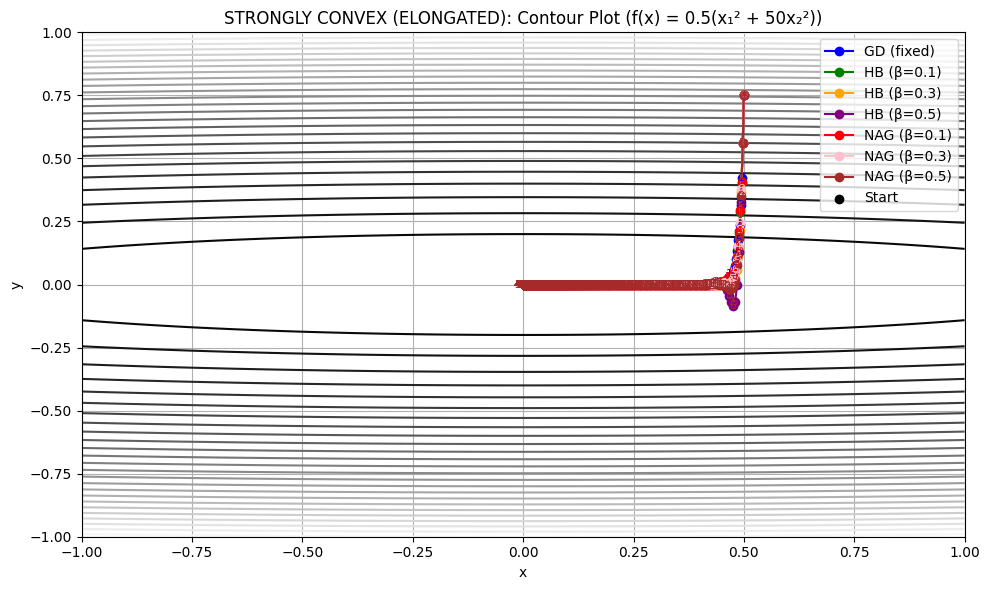

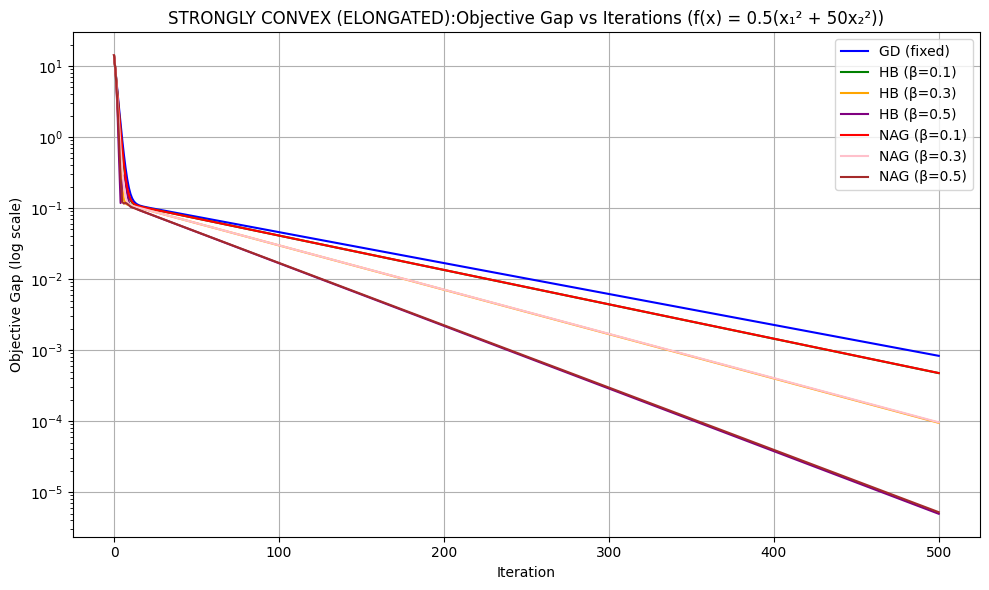

In [ ]:


# Function f2(x, y) = 0.5(x^2 + 50y^2)
def f2(x): return 0.5 * (x[0]**2 + 50 * x[1]**2)
def grad_f2(x): return np.array([x[0], 50 * x[1]])

# Starting point and parameters
start = np.array([0.5, 0.75])
max_iter = 500
step_size = 0.005
beta_values = [0.1, 0.3, 0.5]

# Run all methods
paths_gd = gradient_descent_fixed(f2, grad_f2, start, step_size, max_iter)
paths_hb = [heavy_ball_fixed(f2, grad_f2, start, beta, step_size, max_iter) for beta in beta_values]
paths_nag = [nesterov_fixed(f2, grad_f2, start, beta, step_size, max_iter) for beta in beta_values]

# Contour Plot
def plot_contour_f2():
    plt.figure(figsize=(10, 6))
    x_vals = np.linspace(-1, 1, 400)
    y_vals = np.linspace(-1, 1, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.array([[f2(np.array([xi, yi])) for xi in x_vals] for yi in y_vals])
    plt.contour(X, Y, Z, levels=30, cmap='gray')

    # Plot paths
    plt.plot(paths_gd[:, 0], paths_gd[:, 1], 'o-', label='GD (fixed)', color='blue')
    colors = ['green', 'orange', 'purple']
    for i, path in enumerate(paths_hb):
        plt.plot(path[:, 0], path[:, 1], 'o-', label=f'HB (β={beta_values[i]})', color=colors[i])
    colors = ['red', 'pink', 'brown']
    for i, path in enumerate(paths_nag):
        plt.plot(path[:, 0], path[:, 1], 'o-', label=f'NAG (β={beta_values[i]})', color=colors[i])

    # Label iterates
    for i, (x, y) in enumerate(paths_gd):
        plt.text(x, y, f'{i}', color='blue', fontsize=8, ha='center', va='center')
    for idx, path in enumerate(paths_hb):
        for i, (x, y) in enumerate(path):
            plt.text(x, y, f'{i}', color=colors[idx], fontsize=8, ha='center', va='center')
    for idx, path in enumerate(paths_nag):
        for i, (x, y) in enumerate(path):
            plt.text(x, y, f'{i}', color=colors[idx], fontsize=8, ha='center', va='center')

    plt.scatter(*start, color='black', label='Start')
    plt.title("STRONGLY CONVEX (ELONGATED): Contour Plot (f(x) = 0.5(x₁² + 50x₂²))")
    plt.xlabel('x'); plt.ylabel('y')
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()

# Objective Gap Plot
def plot_objective_gap_f2():
    plt.figure(figsize=(10, 6))

    gap_gd = [f2(x) for x in paths_gd]
    gaps_hb = [[f2(x) for x in path] for path in paths_hb]
    gaps_nag = [[f2(x) for x in path] for path in paths_nag]

    plt.semilogy(gap_gd, label='GD (fixed)', color='blue')
    colors = ['green', 'orange', 'purple']
    for i, gap in enumerate(gaps_hb):
        plt.semilogy(gap, label=f'HB (β={beta_values[i]})', color=colors[i])
    colors = ['red', 'pink', 'brown']
    for i, gap in enumerate(gaps_nag):
        plt.semilogy(gap, label=f'NAG (β={beta_values[i]})', color=colors[i])

    plt.title("STRONGLY CONVEX (ELONGATED):Objective Gap vs Iterations (f(x) = 0.5(x₁² + 50x₂²))")
    plt.xlabel('Iteration')
    plt.ylabel('Objective Gap (log scale)')
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()

# Plot both
plot_contour_f2()
plot_objective_gap_f2()


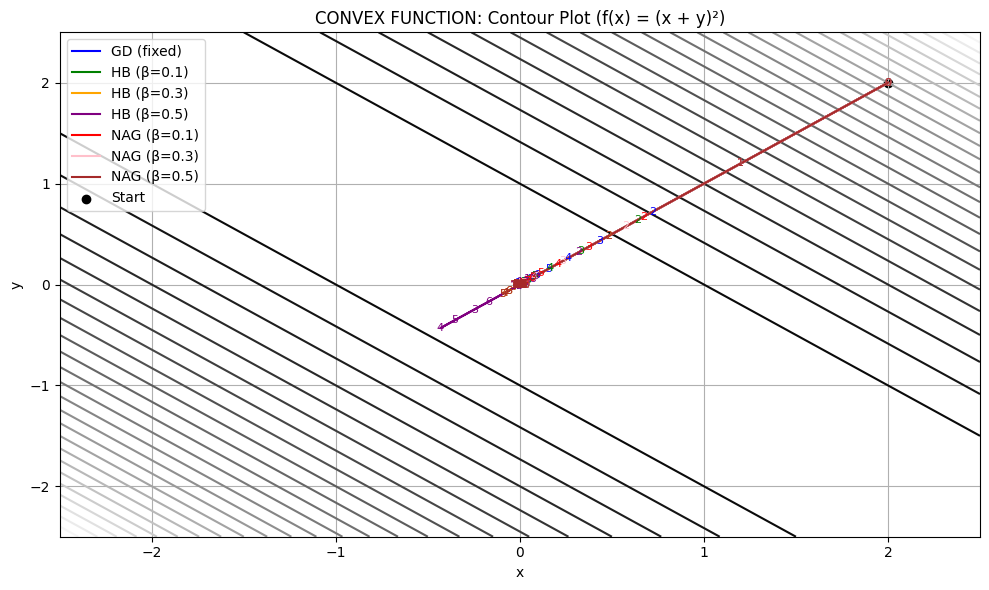

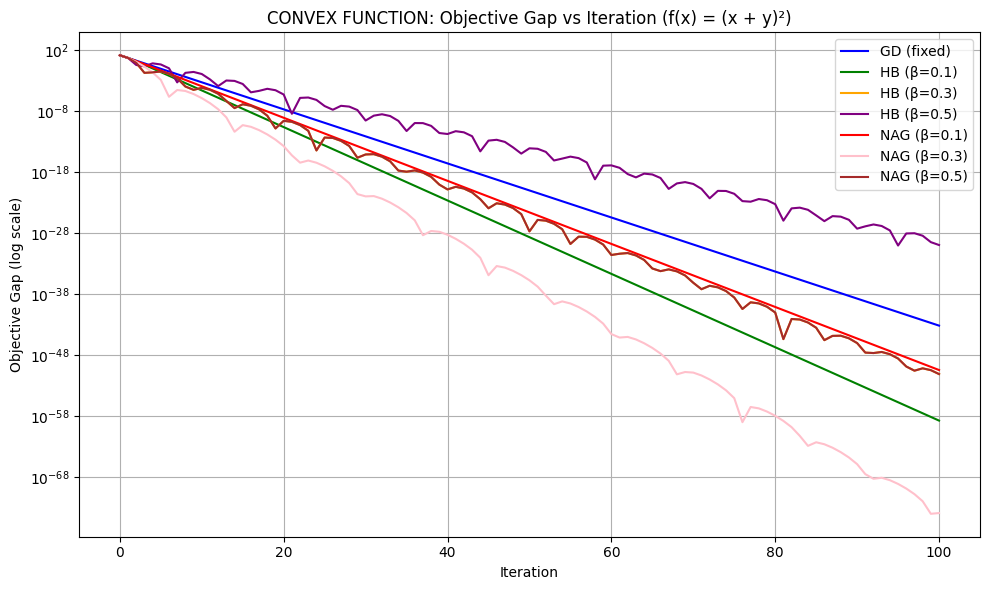

In [ ]:
# --- Define function and gradient ---
def f3(x): return (x[0] + x[1])**2
def grad_f3(x): return 2 * np.array([1, 1]) * (x[0] + x[1])

# --- Optimization settings ---
start = np.array([2.0, 2.0])
max_iter = 100
step_size = 0.1
beta_values = [0.1, 0.3, 0.5]

# --- Run optimization methods ---
paths_gd_f3 = gradient_descent_fixed(f3, grad_f3, start, step_size, max_iter)
paths_hb_f3 = [heavy_ball_fixed(f3, grad_f3, start, beta, step_size, max_iter) for beta in beta_values]
paths_nag_f3 = [nesterov_fixed(f3, grad_f3, start, beta, step_size, max_iter) for beta in beta_values]

# --- Define colors globally ---
colors_hb = ['green', 'orange', 'purple']
colors_nag = ['red', 'pink', 'brown']

# --- Plot contour with trajectories ---
def plot_contour_f3():
    plt.figure(figsize=(10, 6))
    x_vals = np.linspace(-2.5, 2.5, 400)
    y_vals = np.linspace(-2.5, 2.5, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = (X + Y)**2
    plt.contour(X, Y, Z, levels=30, cmap='gray')

    plt.plot(paths_gd_f3[:, 0], paths_gd_f3[:, 1], '-', color='blue', label='GD (fixed)')

    for i, path in enumerate(paths_hb_f3):
        plt.plot(path[:, 0], path[:, 1], '-', color=colors_hb[i], label=f'HB (β={beta_values[i]})')
    for i, path in enumerate(paths_nag_f3):
        plt.plot(path[:, 0], path[:, 1], '-', color=colors_nag[i], label=f'NAG (β={beta_values[i]})')

    for i, (x, y) in enumerate(paths_gd_f3):
        plt.text(x, y, str(i), fontsize=8, color='blue', ha='center', va='center')
    for i, path in enumerate(paths_hb_f3):
        for j, (x, y) in enumerate(path):
            plt.text(x, y, str(j), fontsize=8, color=colors_hb[i], ha='center', va='center')
    for i, path in enumerate(paths_nag_f3):
        for j, (x, y) in enumerate(path):
            plt.text(x, y, str(j), fontsize=8, color=colors_nag[i], ha='center', va='center')

    plt.scatter(*start, color='black', label='Start')
    plt.title("CONVEX FUNCTION: Contour Plot (f(x) = (x + y)²)")
    plt.xlabel('x'); plt.ylabel('y')
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()

# --- Plot objective gap ---
def plot_objective_gap_f3():
    plt.figure(figsize=(10, 6))
    gap_gd = [f3(x) for x in paths_gd_f3]
    gaps_hb = [[f3(x) for x in path] for path in paths_hb_f3]
    gaps_nag = [[f3(x) for x in path] for path in paths_nag_f3]

    plt.semilogy(gap_gd, label='GD (fixed)', color='blue')
    for i, gap in enumerate(gaps_hb):
        plt.semilogy(gap, label=f'HB (β={beta_values[i]})', color=colors_hb[i])
    for i, gap in enumerate(gaps_nag):
        plt.semilogy(gap, label=f'NAG (β={beta_values[i]})', color=colors_nag[i])

    plt.title("CONVEX FUNCTION: Objective Gap vs Iteration (f(x) = (x + y)²)")
    plt.xlabel('Iteration')
    plt.ylabel('Objective Gap (log scale)')
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()

# --- Run plots ---
plot_contour_f3()
plot_objective_gap_f3()


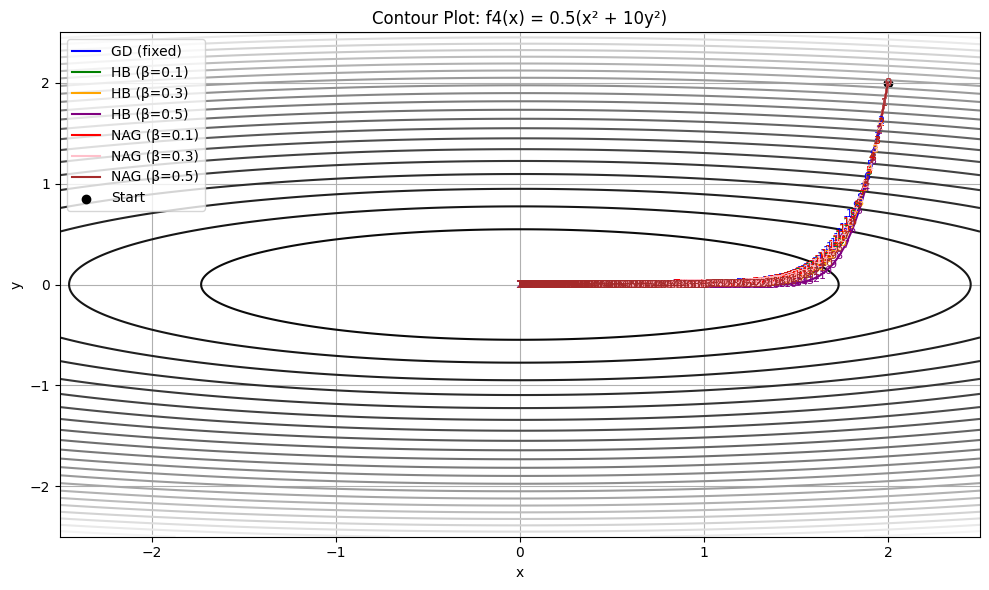

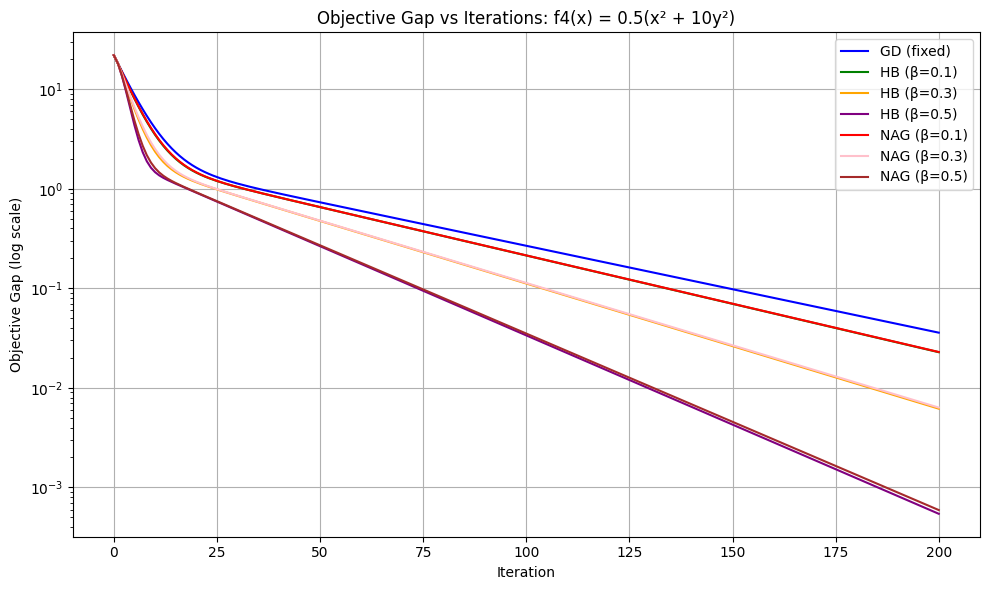

In [ ]:
# --- Define function and gradient ---
def f4(x): return 0.5 * (x[0]**2 + 10 * x[1]**2)
def grad_f4(x): return np.array([x[0], 10 * x[1]])

# --- Optimization settings ---
start = np.array([2.0, 2.0])
max_iter = 200
step_size = 0.01
beta_values = [0.1, 0.3, 0.5]

# --- Run optimization methods ---
paths_gd_f4 = gradient_descent_fixed(f4, grad_f4, start, step_size, max_iter)
paths_hb_f4 = [heavy_ball_fixed(f4, grad_f4, start, beta, step_size, max_iter) for beta in beta_values]
paths_nag_f4 = [nesterov_fixed(f4, grad_f4, start, beta, step_size, max_iter) for beta in beta_values]

# --- Define colors globally ---
colors_hb = ['green', 'orange', 'purple']
colors_nag = ['red', 'pink', 'brown']

# --- Plot contour with trajectories ---
def plot_contour_f4():
    plt.figure(figsize=(10, 6))
    x_vals = np.linspace(-2.5, 2.5, 400)
    y_vals = np.linspace(-2.5, 2.5, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = 0.5 * (X**2 + 10 * Y**2)
    plt.contour(X, Y, Z, levels=30, cmap='gray')

    plt.plot(paths_gd_f4[:, 0], paths_gd_f4[:, 1], '-', color='blue', label='GD (fixed)')

    for i, path in enumerate(paths_hb_f4):
        plt.plot(path[:, 0], path[:, 1], '-', color=colors_hb[i], label=f'HB (β={beta_values[i]})')
    for i, path in enumerate(paths_nag_f4):
        plt.plot(path[:, 0], path[:, 1], '-', color=colors_nag[i], label=f'NAG (β={beta_values[i]})')

    for i, (x, y) in enumerate(paths_gd_f4):
        plt.text(x, y, str(i), fontsize=8, color='blue', ha='center', va='center')
    for i, path in enumerate(paths_hb_f4):
        for j, (x, y) in enumerate(path):
            plt.text(x, y, str(j), fontsize=8, color=colors_hb[i], ha='center', va='center')
    for i, path in enumerate(paths_nag_f4):
        for j, (x, y) in enumerate(path):
            plt.text(x, y, str(j), fontsize=8, color=colors_nag[i], ha='center', va='center')

    plt.scatter(*start, color='black', label='Start')
    plt.title("Contour Plot: f4(x) = 0.5(x² + 10y²)")
    plt.xlabel('x'); plt.ylabel('y')
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()

# --- Plot objective gap ---
def plot_objective_gap_f4():
    plt.figure(figsize=(10, 6))
    gap_gd = [f4(x) for x in paths_gd_f4]
    gaps_hb = [[f4(x) for x in path] for path in paths_hb_f4]
    gaps_nag = [[f4(x) for x in path] for path in paths_nag_f4]

    plt.semilogy(gap_gd, label='GD (fixed)', color='blue')
    for i, gap in enumerate(gaps_hb):
        plt.semilogy(gap, label=f'HB (β={beta_values[i]})', color=colors_hb[i])
    for i, gap in enumerate(gaps_nag):
        plt.semilogy(gap, label=f'NAG (β={beta_values[i]})', color=colors_nag[i])

    plt.title("Objective Gap vs Iterations: f4(x) = 0.5(x² + 10y²)")
    plt.xlabel('Iteration')
    plt.ylabel('Objective Gap (log scale)')
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()

# --- Run plots ---
plot_contour_f4()
plot_objective_gap_f4()


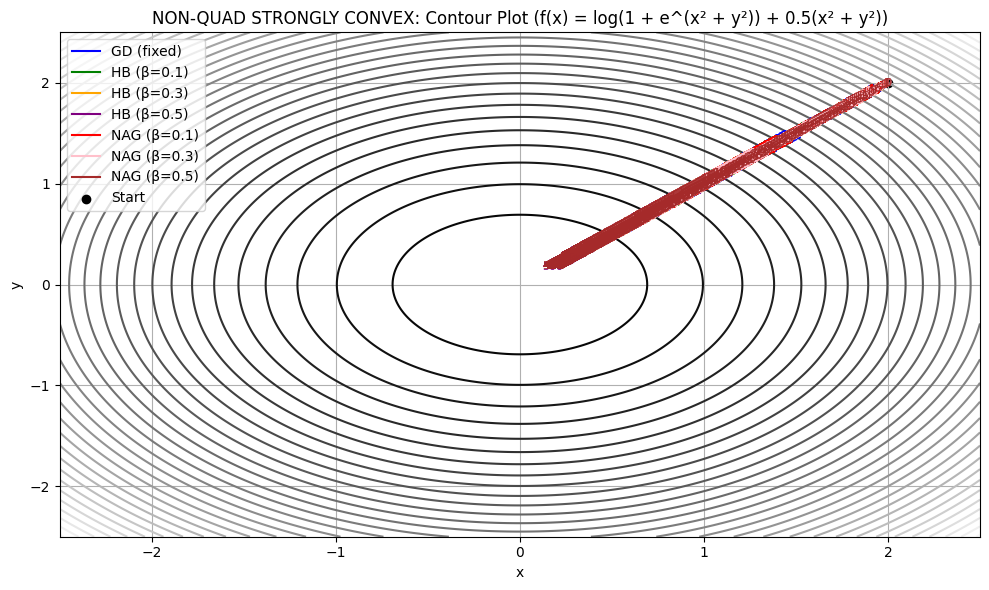

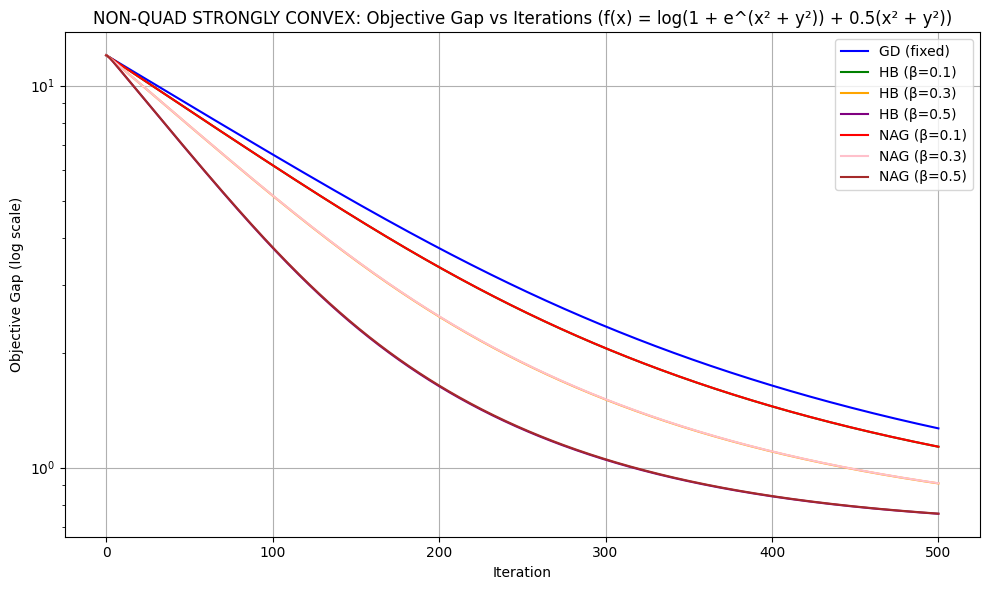

In [ ]:
# --- Define non-quadratic strongly convex function and gradient for f5 ---
def f5(x):
    return np.log(1 + np.exp(x[0]**2 + x[1]**2)) + 0.5 * (x[0]**2 + x[1]**2)

def grad_f5(x):
    # Gradient of f5(x) = log(1 + e^(x² + y²)) + 0.5(x² + y²)
    exp_term = np.exp(x[0]**2 + x[1]**2)
    return np.array([
        (2 * x[0] * exp_term) / (1 + exp_term) + x[0],
        (2 * x[1] * exp_term) / (1 + exp_term) + x[1]
    ])

step_size = 0.001
max_iter = 500


# --- Run optimization methods for f5 ---
paths_gd_f5 = gradient_descent_fixed(f5, grad_f5, start, step_size, max_iter)
paths_hb_f5 = [heavy_ball_fixed(f5, grad_f5, start, beta, step_size, max_iter) for beta in beta_values]
paths_nag_f5 = [nesterov_fixed(f5, grad_f5, start, beta, step_size, max_iter) for beta in beta_values]

# --- Contour plot for f5 ---
def plot_contour_f5():
    plt.figure(figsize=(10, 6))
    x_vals = np.linspace(-2.5, 2.5, 400)
    y_vals = np.linspace(-2.5, 2.5, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = np.log(1 + np.exp(X**2 + Y**2)) + 0.5 * (X**2 + Y**2)
    plt.contour(X, Y, Z, levels=30, cmap='gray')

    # Plot trajectories for GD, HB, and NAG
    plt.plot(paths_gd_f5[:, 0], paths_gd_f5[:, 1], '-', color='blue', label='GD (fixed)')
    for i, path in enumerate(paths_hb_f5):
        plt.plot(path[:, 0], path[:, 1], '-', color=colors_hb[i], label=f'HB (β={beta_values[i]})')
    for i, path in enumerate(paths_nag_f5):
        plt.plot(path[:, 0], path[:, 1], '-', color=colors_nag[i], label=f'NAG (β={beta_values[i]})')

    # Label iterations on the path
    for i, (x, y) in enumerate(paths_gd_f5):
        plt.text(x, y, str(i), fontsize=8, color='blue', ha='center', va='center')
    for i, path in enumerate(paths_hb_f5):
        for j, (x, y) in enumerate(path):
            plt.text(x, y, str(j), fontsize=8, color=colors_hb[i], ha='center', va='center')
    for i, path in enumerate(paths_nag_f5):
        for j, (x, y) in enumerate(path):
            plt.text(x, y, str(j), fontsize=8, color=colors_nag[i], ha='center', va='center')

    # Mark starting point
    plt.scatter(*start, color='black', label='Start')
    plt.title("NON-QUAD STRONGLY CONVEX: Contour Plot (f(x) = log(1 + e^(x² + y²)) + 0.5(x² + y²))")
    plt.xlabel('x'); plt.ylabel('y')
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()

# --- Objective gap plot for f5 ---
def plot_objective_gap_f5():
    plt.figure(figsize=(10, 6))
    gap_gd = [f5(x) for x in paths_gd_f5]
    gaps_hb = [[f5(x) for x in path] for path in paths_hb_f5]
    gaps_nag = [[f5(x) for x in path] for path in paths_nag_f5]

    plt.semilogy(gap_gd, label='GD (fixed)', color='blue')
    for i, gap in enumerate(gaps_hb):
        plt.semilogy(gap, label=f'HB (β={beta_values[i]})', color=colors_hb[i])
    for i, gap in enumerate(gaps_nag):
        plt.semilogy(gap, label=f'NAG (β={beta_values[i]})', color=colors_nag[i])

    plt.title("NON-QUAD STRONGLY CONVEX: Objective Gap vs Iterations (f(x) = log(1 + e^(x² + y²)) + 0.5(x² + y²))")
    plt.xlabel('Iteration')
    plt.ylabel('Objective Gap (log scale)')
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()

# --- Run both plots for f5 ---
plot_contour_f5()
plot_objective_gap_f5()
